# Differentiation:

## Finite Difference Algorithms

*Forward difference* and *central difference*:

\begin{align}
D_\text{fd} y(t) &\equiv \frac{y(t+h) - y(t)}{h} \\
D_\text{cd} y(t) &\equiv \frac{y\Big(t + \frac{h}{2}\Big) - y\Big(t - \frac{h}{2}\Big)}{h}
\end{align}

and also the *extended difference algorithm*

\begin{align}
D_\text{ed} y(t) &\equiv \frac{4 D_\text{cd}y(t, h/2) - D_\text{cd}y(t, h)}{3} \\
  &= \frac{8\big(y(t+h/4) - y(t-h/4)\big) - \big(y(t+h/2) - y(t-h/2)\big)}{3h}
\end{align}


Implement the three finite difference operators `D_fd`, `D_cd`, and `D_ed` in the module **`diffops.py`**.

In [16]:
#importing the goods
import numpy as np
import matplotlib.pyplot as plt
#functions we'll use
def D_fd(y, t, h):
    #'''Forward difference'''
      dfd = (y(t+h)-y(t))/h
      return dfd

def D_cd(y, t, h):
    #"""Central difference"""
      dcd = (y(t+h/2)-y(t-h/2))/h
      return dcd

def D_ed(y, t, h):
    #"""Extended difference"""
      a = 4*D_cd(y,t,h/2)
      b = D_cd(y,t,h)
      return (a-b)/3


def error(Dxx, y, y1, t, h):
      E = (Dxx(y,t,h)-y1(t))/y1(t)
      return E

We'll consider a test function: $y(t) = \cos t$ and compute the following:
1. The analytical derivative $\frac{d\cos(t)}{dt}$?
1. Calculated derivative of $y(t) = \cos t$ at $t=0.1, 1, 100$.
1. Print derivative and relative error $E = \frac{D y(t) - y^{(1)}(t)}{y^{(1)}(t)}$ (finite difference value $D y(t)$ compared to the analytical value $y^{(1)}(t)$– use numpy functions for "exact" values) as function of $h$.
1. Reduce $h$ to machine precision, $h \approx \epsilon_m$
1. Plot $\log_{10} |E(h)|$ against $\log_{10} h$.

In [17]:
# test function
y = np.cos

# Analytical derivative
def y1(t):
    return -np.sin(t)

t_values = np.array([0.1, 1, 100], dtype=np.float64)

## Forward difference 

### Finite difference derivatives

We calculate $D_\text{fd}\cos(t)$ for $h=0.1$ on our `t_values`.

Note that we pass *a function* `y` to the forward difference function `D_fd` and we can also pass a whole array of `t_values`!

In [18]:
D_fd(y, t_values, 0.1)

array([-0.14937587, -0.86706184,  0.46244209])

### Evaluate the exact derivatives
Computing the exact derivatives

In [19]:
y1(t_values)

array([-0.09983342, -0.84147098,  0.50636564])

Calculation of the **absolute error**: subtracting the two arrays we got previously:

$$
\Delta = D y(t) - y^{(1)}(t)
$$

(finite difference value $D y(t)$ compared to the analytical value $y^{(1)}(t)$

In [20]:
D_fd(y,t_values,0.1)-y1(t_values)

array([-0.04954246, -0.02559086, -0.04392355])

### Calculate the relative error $E$

$$
E = \frac{\Delta}{y^{(1)}(t)} = \frac{D y(t) - y^{(1)}(t)}{y^{(1)}(t)}
$$

In [21]:
error(D_fd, y, y1, t_values, 0.1)

array([ 0.49625125,  0.03041205, -0.08674275])

### Plot $|E|$
Plotting $\log_{10} |E(h)|$ against $\log_{10} h$.

In [22]:
%matplotlib inline
plt.matplotlib.style.use("ggplot")

We are looking for the error over a range of $h$ values, $10^{-15} \le h \le 10^{-1}$ and at $t=0.1$

In [23]:
h_values = 10**(np.linspace(-15, -1, 141))
error(D_fd, y, y1, 0.1, h_values)

array([1.12075557e-01, 7.66706029e-01, 4.03344481e-01, 1.14716144e-01,
       3.28175761e-01, 5.50075075e-02, 1.17363001e-01, 1.09441226e-01,
       5.75125882e-02, 1.20016143e-01, 8.68001641e-04, 6.00236172e-02,
       5.25083608e-02, 3.24452994e-03, 1.82680833e-02, 1.98405905e-02,
       5.62670122e-03, 2.06859275e-02, 4.63695882e-03, 8.01452889e-03,
       8.68001641e-04, 7.02243638e-03, 3.39130398e-03, 3.24452994e-03,
       5.59073113e-04, 2.25713208e-03, 3.98862145e-05, 7.15985417e-04,
       1.11191686e-03, 1.01442800e-03, 8.68001641e-04, 8.38965284e-04,
       5.84615017e-04, 4.57739576e-04, 1.16347859e-04, 1.47117067e-04,
       3.98862145e-05, 5.03206816e-05, 5.44042741e-05, 3.44138732e-05,
       8.95487504e-05, 4.39475710e-05, 2.32772245e-05, 1.18531179e-05,
       2.78028083e-05, 6.44939982e-06, 1.19521394e-05, 5.94303255e-06,
       1.52864472e-06, 6.41346961e-06, 5.82705843e-07, 8.61345046e-06,
       2.22705728e-06, 7.05956485e-07, 1.23929305e-06, 2.93270812e-06,
      

Plot in a log-log plot $|E(h)|$ (for $t=0.1$)

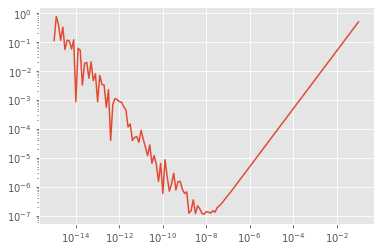

In [24]:
errors = error(D_fd, y, y1, 0.1, h_values)
#errors = np.log10(abs(errors))
#logh = np.log10(h_values)
plt.loglog(h_values,abs(errors))

Plot the three different $t$ values together in one plot:

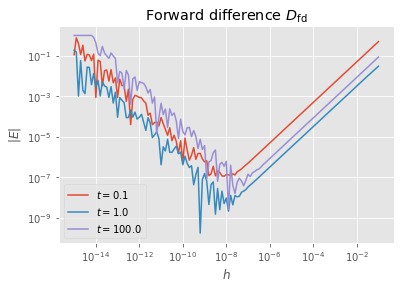

In [25]:
# INCOMPLETE: replace NotImplemented values by appropriate terms
for t in t_values:
    rel_errors = error(D_fd, y, y1, t, h_values)
    plt.loglog(h_values, abs(rel_errors), label=r"$t={}$".format(t))
    
ax = plt.gca()
ax.legend(loc="best")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"$|E|$")
ax.set_title(r"Forward difference $D_\mathrm{fd}$");

## Central difference 

For the central difference algorithm, we plot in a log-log plot $|E(h)|$ for all $t$ values:

Text(0.5, 1.0, 'Central difference $D_\\mathrm{cd}$')

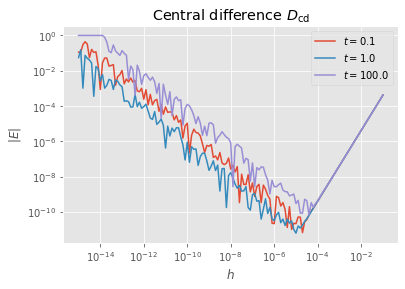

In [26]:
for t in t_values:
    rel_errors = error(D_cd, y, y1, t, h_values)
    plt.loglog(h_values, abs(rel_errors), label=r"$t={}$".format(t))
    
ax = plt.gca()
ax.legend(loc="best")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"$|E|$")
ax.set_title(r"Central difference $D_\mathrm{cd}$")

## Extended difference 

For the extended difference algorithm, we plot in a log-log plot $|E(h)|$ for all $t$ values:

Text(0.5, 1.0, 'Extended difference $D_\\mathrm{ed}$')

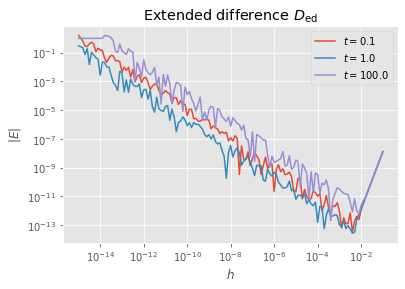

In [27]:
for t in t_values:
    rel_errors = error(D_ed, y, y1, t, h_values)
    plt.loglog(h_values, abs(rel_errors), label=r"$t={}$".format(t))
    
ax = plt.gca()
ax.legend(loc="best")
ax.set_xlabel(r"$h$")
ax.set_ylabel(r"$|E|$")
ax.set_title(r"Extended difference $D_\mathrm{ed}$")